# ObsID : 0945060133, SRCNUM : 5, Instru : EMOS2
Not on Simbad.

## ESASky
EPIC Stack's pointer is not on the source location from XMM-Archive link. The closest pointer are far from the source (https://sky.esa.int/esasky/?target=53.59479166666666%20-28.90244444444444&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr).

``GAIA``

- Designation : Gaia DR3 5057101614813827200
- RA : 53.5942754°
- DEC : -28.9023933°
- Parallax : 2.941 mas
- G : 19.6951

``2MASS``

- Name : 03342264-2854082
- RA : 53.5943410°
- DEC : -28.9022880°

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945060133_SRCNUM5_EMOS2_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.949e-03 +/- 7.103e-04 (86.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.154e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945060133_SRCNUM5_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.154e+04 sec
 Using Response (RMF) File            ObsID0945060133_SRCNUM5_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945060133_SRCNUM5_EMOS2.arf



In [1]:
print(f"Number of counts = {4.949e-03*1.154e+04} cts")

Number of counts = 57.11146 cts


The number of counts is lower than 100 cts, indicating that the C-statistic should be a better fit statistic choice.

## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 857.5, 659.5, -0.5)

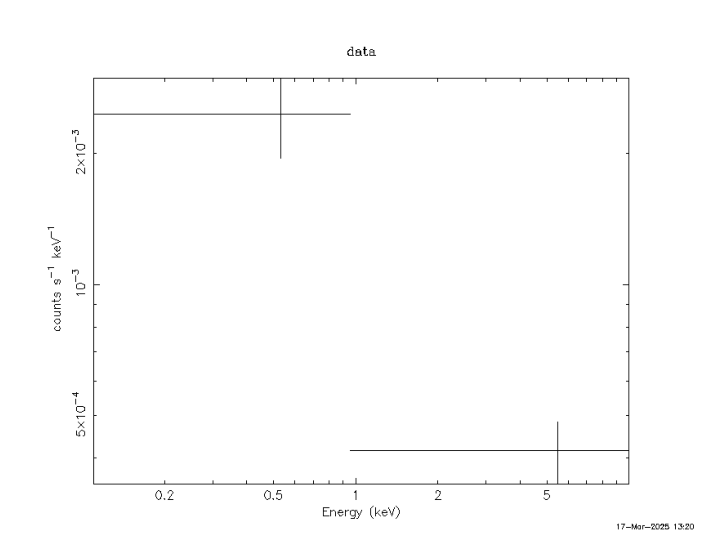

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Apec model

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Powerlaw model

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit